## Importing Libraries

In [1667]:
## Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import os

In [1668]:
## Supress Warinings
import warnings
warnings.filterwarnings('ignore')

## Reading datasets from the csv files.

In [1669]:
## Reading the csv file.
data_house= pd.read_csv(r"C:\Users\Rushab\Documents\Hands on Python new\Machine Learning\Machine Learning lll\train.csv", encoding="utf-8")

In [1670]:
## Observing the first couple of rows.
data_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1671]:
## Checking the shape of the data frame that is finding the number of rows and columns.
data_house.shape

(1460, 81)

In [1672]:
## Finding the information of the dataset like the null values and the datatypes of all the attributes.
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1673]:
## Checking the percentage of null values.
round(100*(data_house.isnull().sum()/len(data_house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1674]:
## From the above analysis we can see that there are several attribiutes with null values.

In [1675]:
## Using the describe function to find out details of the numerical datas.
data_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1676]:
## Checking the mean, min and max values to understand the distribution of data in a better way.

In [1677]:
## Checking the duplicate values in the attributre 'ID' from the above dataset.
sum(data_house.duplicated(subset = 'Id')) == 0

True

## Checking the outliners.

In [1678]:
data_house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [1679]:
## from the above observation we can see that there are sevral attributes 

Text(0.5, 1.0, 'Distibution for LotFrontage')

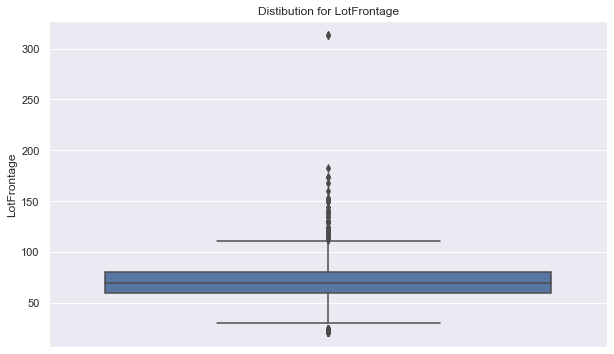

In [1680]:
## Drawing a Boxplot for LotFrotage
plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_house,y='LotFrontage')
plt.title('Distibution for LotFrontage')

#### From the above analysis we can see that there are quite a few Outliners.

Text(0.5, 1.0, 'Distibution for LotArea')

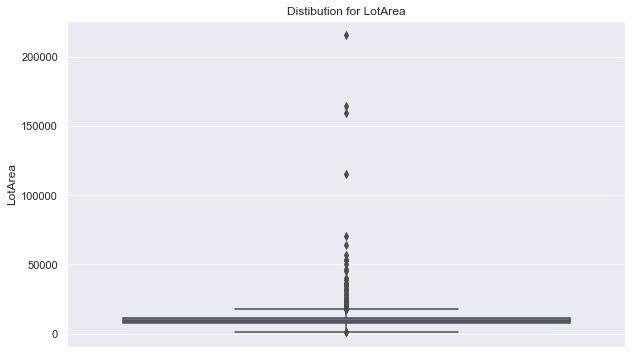

In [1681]:
## Drawing a Boxplot for LotArea 
plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_house,y='LotArea')
plt.title('Distibution for LotArea')

#### From the above analysis we can see that there are quite a few Outliners.

Text(0.5, 1.0, 'Distibution for YearBuilt')

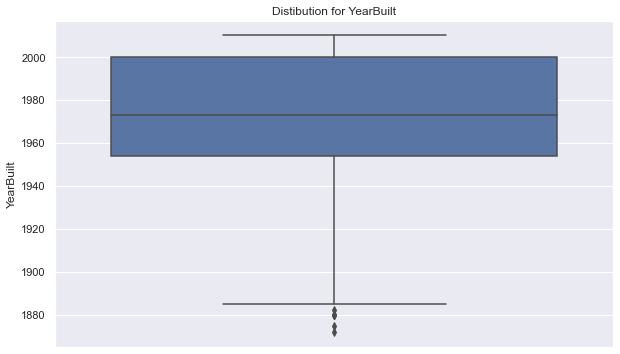

In [1682]:
## Drawing a Boxplot for YearBuilt 
plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_house,y='YearBuilt')
plt.title('Distibution for YearBuilt')

#### From the above analysis we can see that there are no Outliners on maximum threshold yet there are few outliners in the lower or minimum threshold.

Text(0.5, 1.0, 'Distibution for BsmtFinSF1')

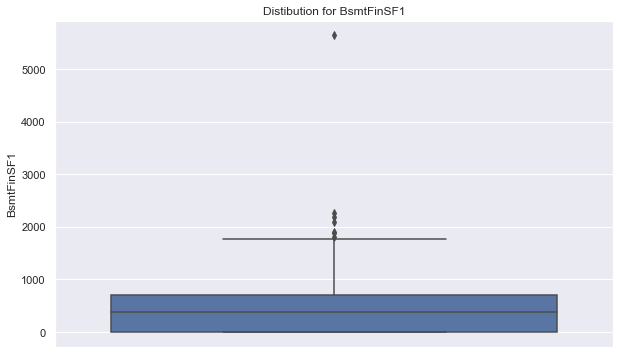

In [1683]:
## Drawing a Boxplot for BsmtFinSF1  
plt.figure(figsize = [10,6]) 
sns.boxplot(data=data_house,y='BsmtFinSF1')
plt.title('Distibution for BsmtFinSF1')

#### From the above analysis we can see that there are quite a few Outliners.

In [1684]:
## Simillarly there are such outliners in sevral other attributes within the dataset.

In [1685]:
#null_data = pd.DataFrame(round(data_house.isnull().sum()/len(data_house.index)*100,2).sort_values(ascending=False),columns=["Null %"])
#null_data.index.name = 'Features'
#null_data.head()

In [1686]:
#null_data_house = null_data[null_data["Null %"] > 0]
#null_data_house

In [1687]:
## Observing the Outliers in the numerical attributes.
data_house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [1688]:
data_house['Alley'].value_counts().unique

<bound method Series.unique of Grvl    50
Pave    41
Name: Alley, dtype: int64>

In [1689]:
data_house['MiscFeature'].value_counts().unique

<bound method Series.unique of Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64>

In [1690]:
data_house['Fence'].value_counts().unique

<bound method Series.unique of MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64>

In [1691]:
## Function to remove the Outliner
def rem_outlier(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [1692]:
## Checking the shape before the removal of attributes.
data_house.shape

(1460, 81)

In [1693]:
## As from the previous observations we saw that there are several attributes with null values, we will obsrve them in descending order.

In [1694]:
## Displaying the null values in descending order.
data_house.columns[data_house.isnull().any()] 

null_values = data_house.isnull().sum()/len(data_house)*100
null_values = null_values[null_values>0]
null_values.sort_values(inplace=True, ascending=False)
null_values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [1695]:
data_house['PoolQC'].value_counts().unique

<bound method Series.unique of Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64>

In [1696]:
data_house['Alley'].value_counts().unique

<bound method Series.unique of Grvl    50
Pave    41
Name: Alley, dtype: int64>

In [1697]:
data_house['MiscFeature'].value_counts().unique

<bound method Series.unique of Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64>

In [1698]:
data_house['Fence'].value_counts().unique

<bound method Series.unique of MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64>

In [1699]:
## Dropping the 'PoolQC','MiscFeature','Alley','Fence' column becuase thy have very high null value % and id column is not required
data_house = data_house.drop(['PoolQC','Id','Alley','Fence'],axis=1)

In [1700]:
## According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
## Here we will impute the categorical variables with 'None'
null_with_meaning = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MiscFeature"]
for i in null_with_meaning:
    data_house[i].fillna("none", inplace=True)

In [1701]:
## Checking the null values for the attributes
data_house.columns[data_house.isnull().any()] 

null = data_house.isnull().sum()/len(data_house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [1702]:
## Post the above observation the mentioned attributes will be observed seprately.

In [1703]:
# As per the data dictionary provided the "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
data_house['LotFrontage'] = data_house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data_house["GarageYrBlt"].fillna(data_house["GarageYrBlt"].median(), inplace=True)
data_house["MasVnrArea"].fillna(data_house["MasVnrArea"].median(), inplace=True)
data_house["Electrical"].dropna(inplace=True)

In [1704]:
data_house['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1705]:
data_house['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [1706]:
data_house['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1707]:
data_house['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

## EDA

In [1708]:
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,0,12,2008,WD,Normal,250000


In [1709]:
## Creating another dataframe with numerical attributes.
data_house_num = data_house.select_dtypes(include=['float64', 'int64'])
data_house_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Univariate Analysis

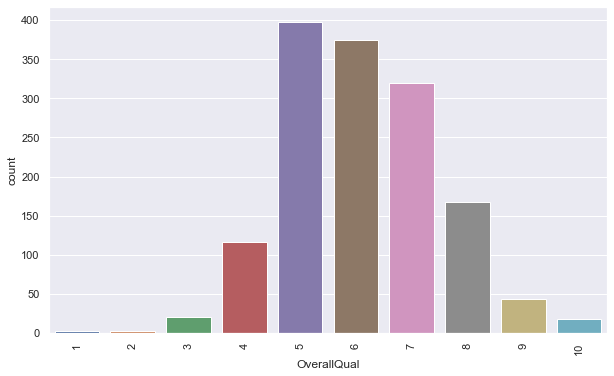

In [1710]:
## Distribution of the attribute OverallQual using count plot.
plt.figure(figsize = [10,6])
sns.countplot(data_house['OverallQual'])
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- Here we can see that most of the house are having rating as Average(5),Above Average(6) or Good(7).
- We can also see that there are very few ratings with a very low rating.

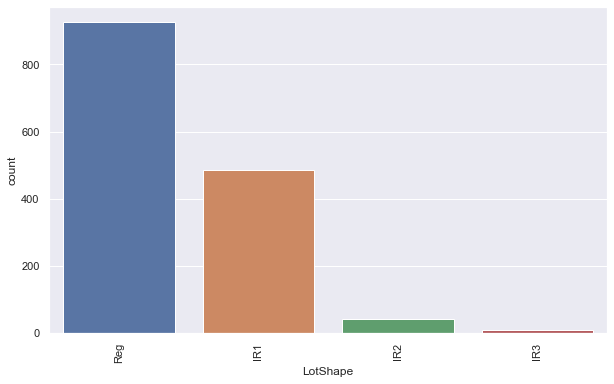

In [1711]:
## Distribution of the attribute LotShape using count plot.
plt.figure(figsize = [10,6])
sns.countplot(data_house['LotShape'])
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- We can see that the highest count of Lot Shape is Regular(Reg).
- We can also observe that there a negligible count of Irregular Lot shape. 

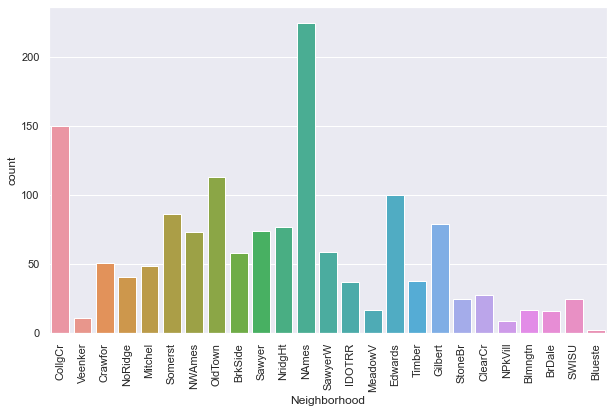

In [1712]:
## Distribution of the attribute Neighborhood using count plot.
plt.figure(figsize = [10,6])
sns.countplot(data_house['Neighborhood'])
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- We can see that the highest count of Neighbourhood is Name Ames.
- We can also observe the lowest count in Neighbourhood is Bluesetems.

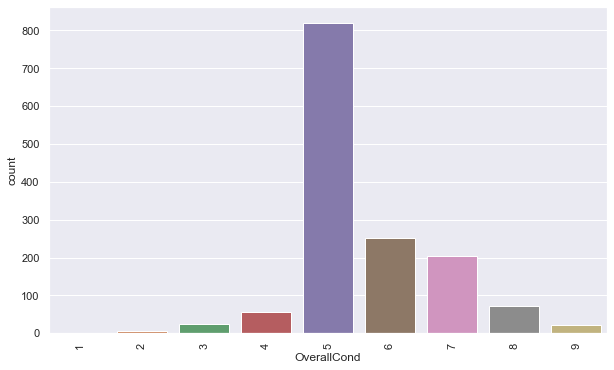

In [1713]:
## Distribution of the attribute OverallCond using count plot.
plt.figure(figsize = [10,6])
sns.countplot(data_house['OverallCond'])
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- We can observe that the maximum count in rating of the Overall Condition of the house is 5 which means Average.

## Bivariate Analysis

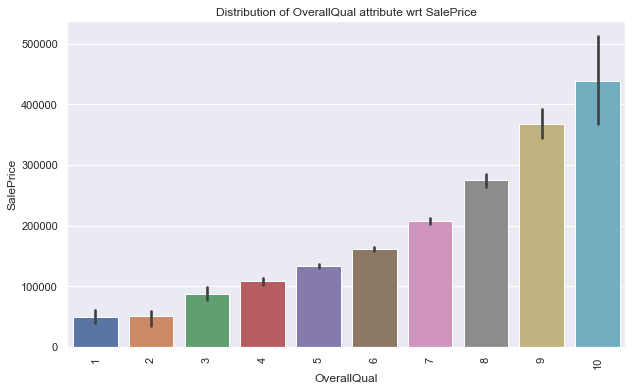

In [1714]:
## Distribution of OverallQual with respect to the SalePrice attribute using countplot.
plt.figure(figsize = [10,6])
sns.barplot(x="OverallQual", y="SalePrice", data= data_house)
plt.title("Distribution of OverallQual attribute wrt SalePrice")
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- We can observe that as the Overall Quality increases the rating of the housing increases.

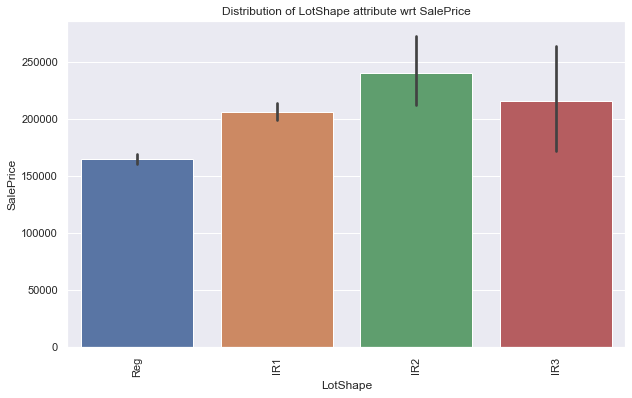

In [1715]:
## Distribution of LotShape with respect to the SalePrice attribute using countplot.
plt.figure(figsize = [10,6])
sns.barplot(x="LotShape", y="SalePrice", data= data_house)
plt.title("Distribution of LotShape attribute wrt SalePrice")
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- As per the above plot the Sales of Moderately Irregular and Slightly irregular plots are high.

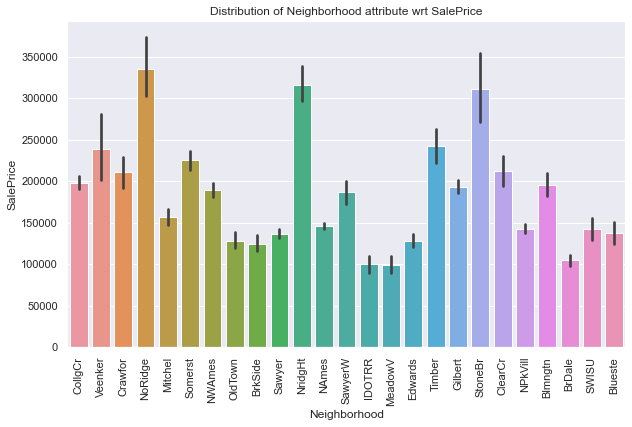

In [1716]:
## Distribution of Neighborhood with respect to the SalePrice attribute using countplot.
plt.figure(figsize = [10,6])
sns.barplot(x="Neighborhood", y="SalePrice", data= data_house)
plt.title("Distribution of Neighborhood attribute wrt SalePrice")
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- As per the above barplot we can obseerve that Prices of the houses in certain neighborhood like NoRidge, NridgHt and StoneBr are quite high compare to other.

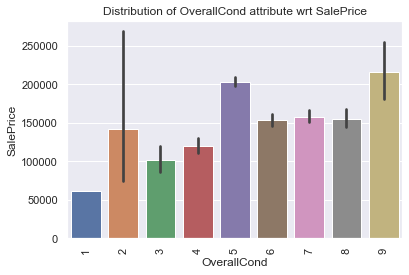

In [1717]:
## Distribution of OverallCond with respect to the SalePrice attribute using countplot.
#plt.figure(figsize = [10,6])
sns.barplot(x="OverallCond", y="SalePrice", data= data_house)
plt.title("Distribution of OverallCond attribute wrt SalePrice")
plt.xticks(rotation=90)
plt.show()

#### Observation:-

- We cant find any majour pattern here in OverallCond wrt to SalePrice.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

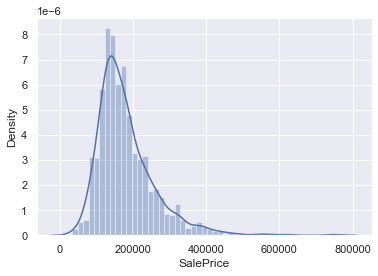

In [1718]:
## Distribution of the SalePrice.
sns.distplot(data_house['SalePrice'])

In [1719]:
data_house_2 = data_house.copy

In [1720]:
## From the above distplot distribution we can see that the SalePrice is skewed towards left. Hence we will now apply log transformation to get the distribution in the centre.  

In [1721]:
## Applyting Logarithmic transformation on SalePrice.
data_house['SalePrice']=np.log1p(data_house['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

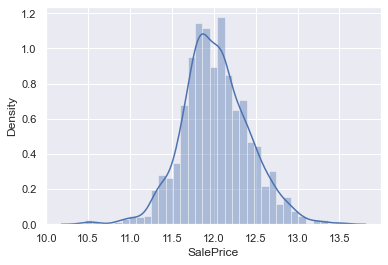

In [1722]:
## Distribution of the SalePrice post the Logarithmic Transformation.
sns.distplot(data_house['SalePrice'])

In [1723]:
## From the above plot we can observe that the plot is now centred post the transformation.

In [1724]:
## Using the Correlation matrix to undersatnd the correlation between the attributes.
data_corr = data_house_num.corr()
data_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


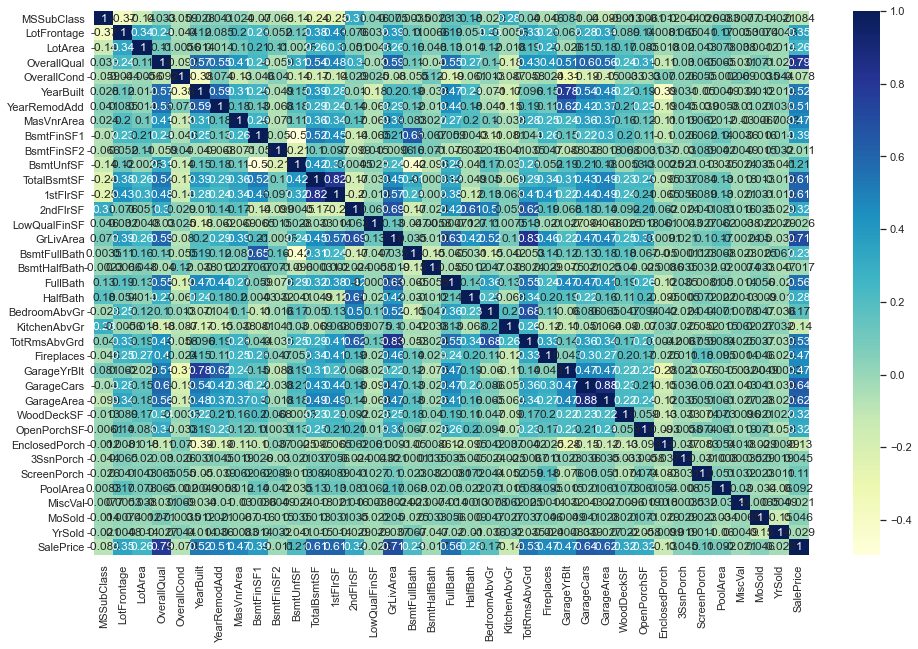

In [1725]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_corr, annot = True, cmap="YlGnBu")
plt.show()

In [1726]:
## The above correlation in tabular and matrix form helps in observing that there are several attributes which are highly correlated.

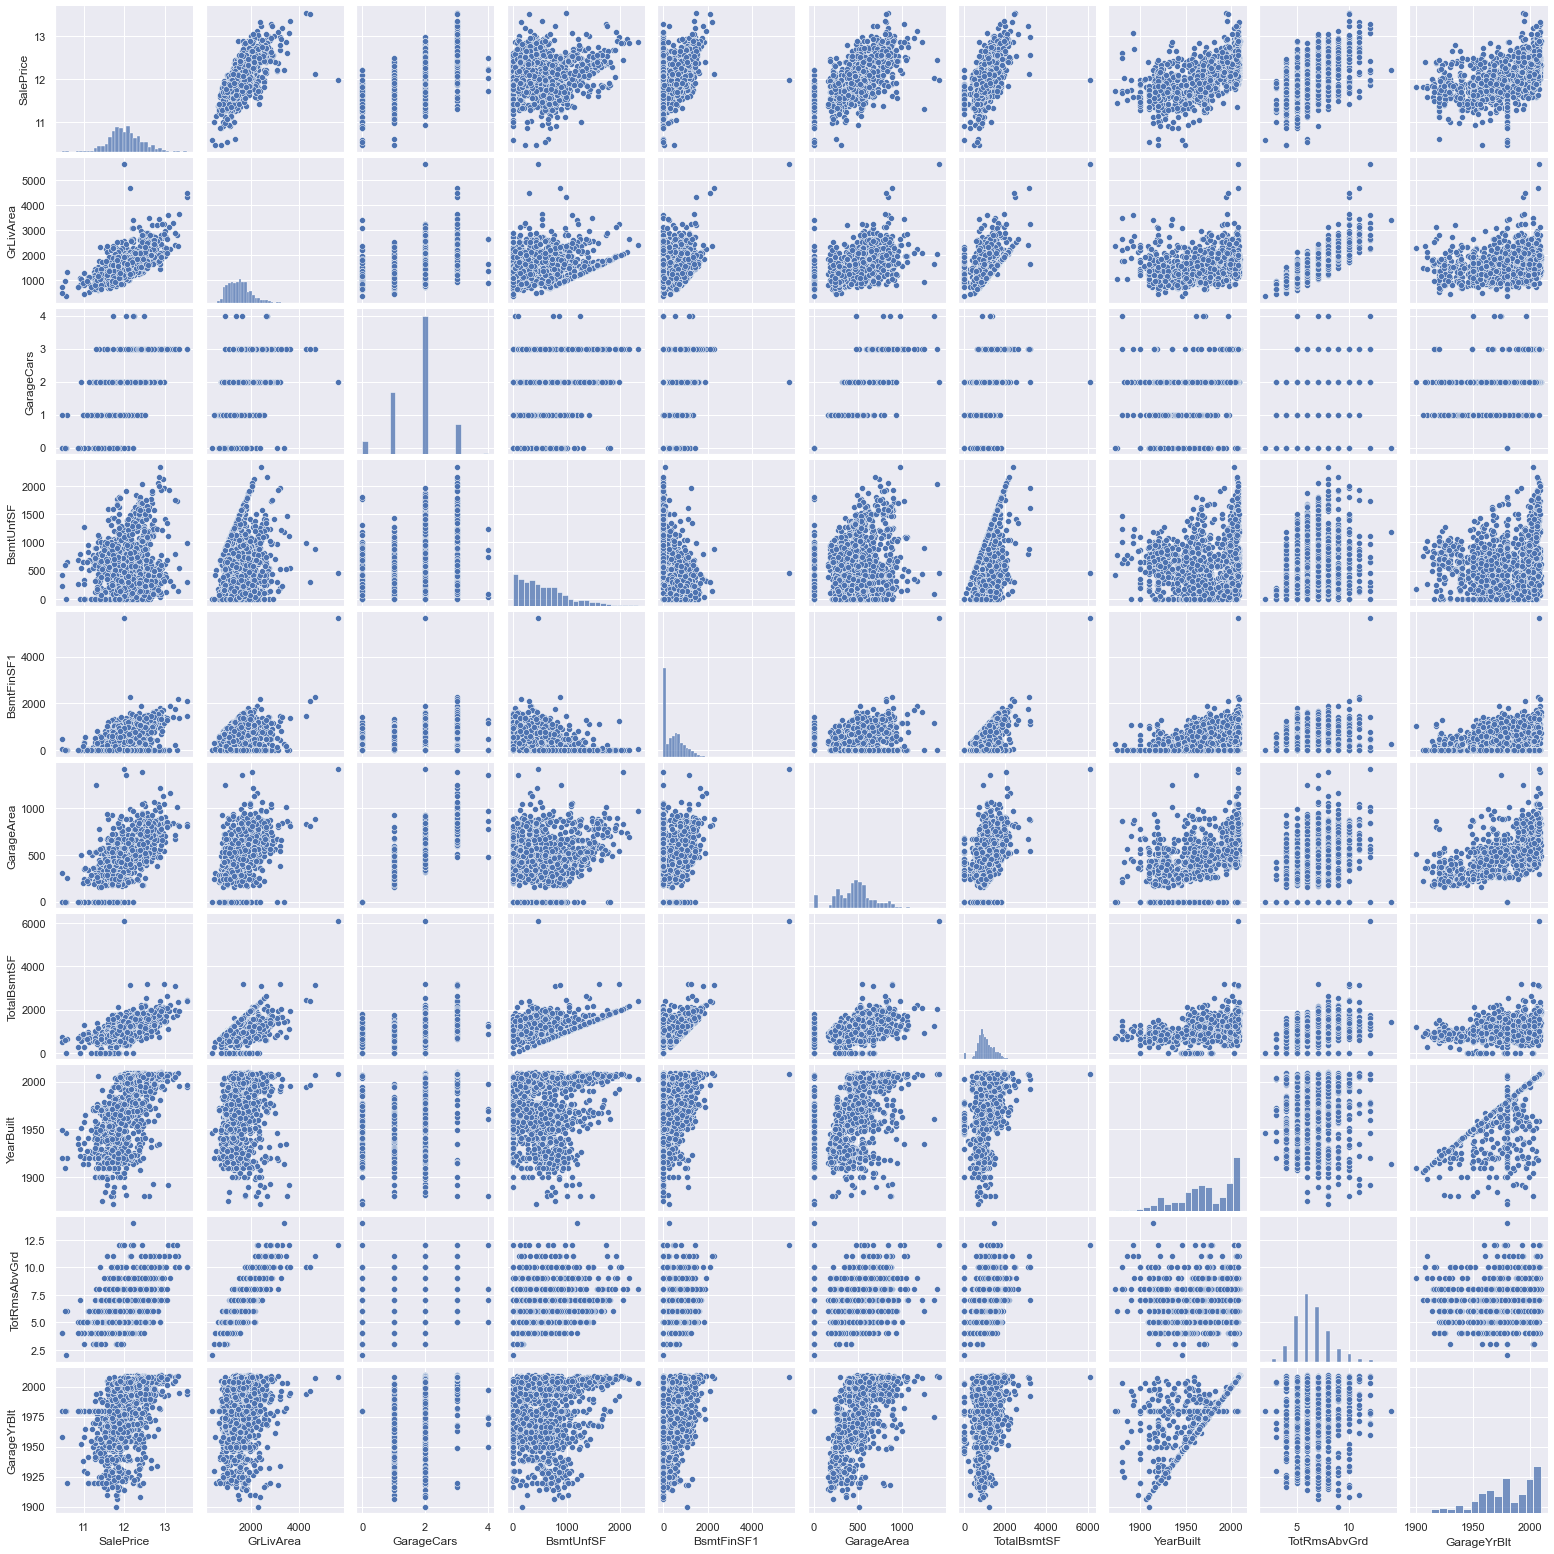

In [1727]:
## Here we will understand the predictive power of some attributes.
# Checking the same with a pairplot 
sns.set()
data_cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data_house[data_cols], size = 2.2)
plt.show()

#### Once we observe the above pairplot we can interpret that certain attributes like GarageCars, BsmtUnfSF, TotRmsAbvGrd and GarageYrBlt are correlated and they dont contribute to the SalePrice attribute.

In [1728]:
## Dropping attributes which are correlated and have no effect on the SalePrice.
data_house = data_house.drop(['GarageCars'], axis = 1)
data_house = data_house.drop(['BsmtUnfSF'], axis = 1)
data_house = data_house.drop(['TotRmsAbvGrd'], axis = 1)
data_house = data_house.drop(['GarageYrBlt'], axis = 1) 

In [1729]:
## Observing the dataframe post dropping the correlated values.
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,0,12,2008,WD,Normal,12.429220


In [1730]:
data_house.shape

(1460, 73)

In [1731]:
## Observing the Numeric Attributes.
data_house.select_dtypes(exclude=['object'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,11.864469


In [1732]:
## Checking the effect of numeric attributes with SalePrice

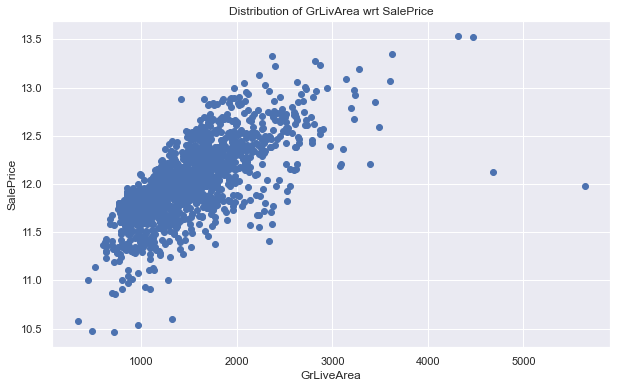

In [1733]:
## Distribution of GrLivArea wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='GrLivArea', y='SalePrice', data=data_house)
plt.title("Distribution of GrLivArea wrt SalePrice")
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- We can see that as the GrLiveArea increases the SalePrice increases.
- We can also see some Outlier values.

In [1734]:
## From the above distribution we can see that there are outliers in the data.

In [1735]:
## Removing few outliers from the attribute GrLivArea using the function rem_outlier.
data_house = rem_outlier(data_house,'GrLivArea')

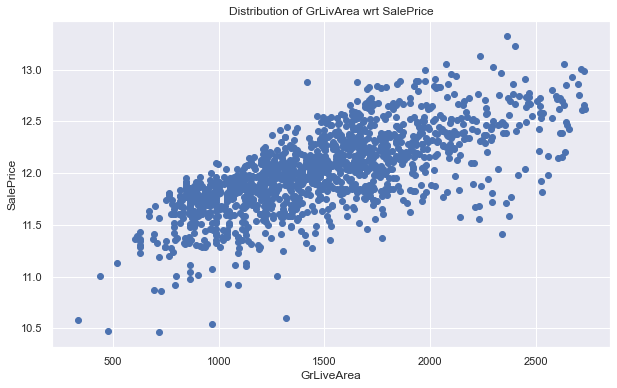

In [1736]:
## Distribution of GrLivArea wrt to SalePrice post removal of Outliers.
plt.figure(figsize = [10,6])
plt.scatter(x='GrLivArea', y='SalePrice', data=data_house)
plt.title("Distribution of GrLivArea wrt SalePrice")
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- Here we can see a better and more smoother linear relation in between GrLiveArea and SalePrice with no Outliers.
- There is a positive relation in between the GrLiveArea and SalePrice.

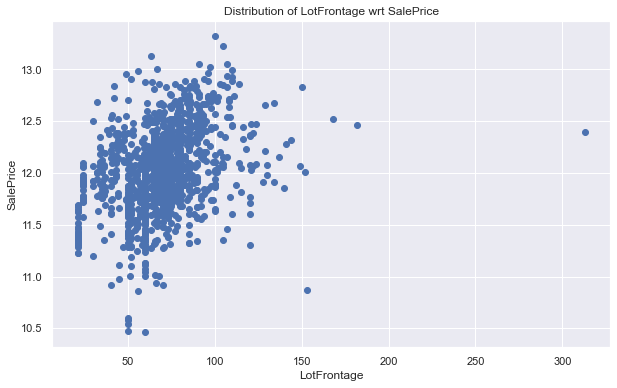

In [1737]:
## Distribution of LotFrontage wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='LotFrontage', y='SalePrice', data=data_house)
plt.title("Distribution of LotFrontage wrt SalePrice")
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- Here we can observe most LotFrontage are within the value 200 on the X-axis and as the LotFrotage increases within this range the SalePrice increases.

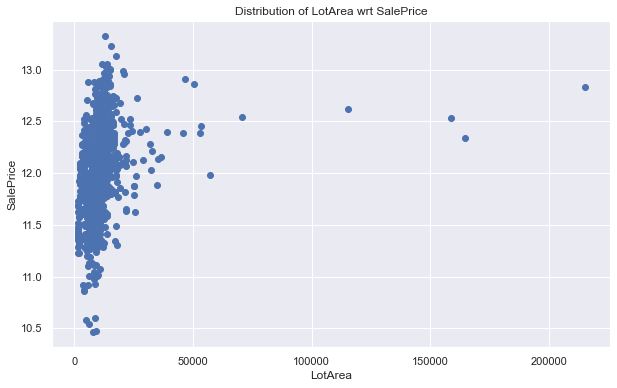

In [1738]:
## Distribution of LotArea wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='LotArea', y='SalePrice', data=data_house)
plt.title("Distribution of LotArea wrt SalePrice")
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- Here we can observe most a steady increase in SalePrice of the LotArea within a particular timit itself and the datapoints are mostly clustered.

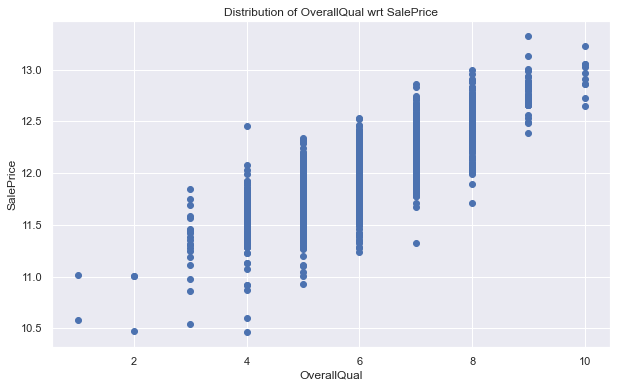

In [1739]:
## Distribution of OverallQual wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='OverallQual', y='SalePrice', data=data_house)
plt.title("Distribution of OverallQual wrt SalePrice")
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- Here we can observe that there is a steady increase in the SalePrice wrt to the rating of the OverallQual, yet each there are variation of SalePrice within each ratings as well.

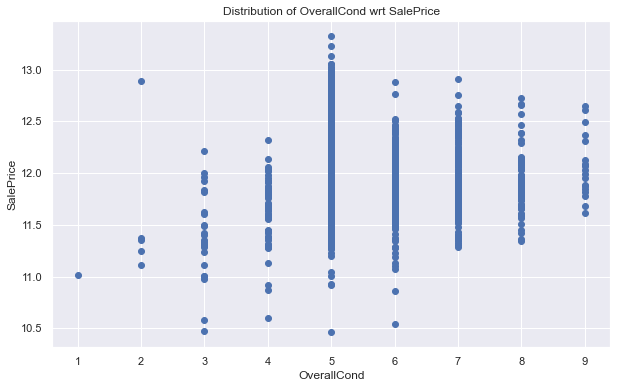

In [1740]:
## Distribution of OverallCond wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='OverallCond', y='SalePrice', data=data_house)
plt.title("Distribution of OverallCond wrt SalePrice")
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- Here we can observe that there is a Variation in the SalePrice according to the rating of the OverallCond, specially wrt to the houses with rating 5.

## Deriving the age of the property once it is sold.

In [1741]:
# PAge -  Property Age from yearsold - yearbuilt
data_house['PAge'] = (data_house['YrSold'] - data_house['YearBuilt'])
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,0,12,2008,WD,Normal,12.429220,8


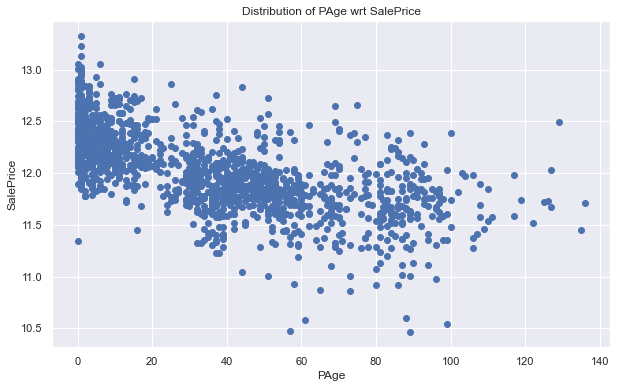

In [1742]:
## Distribution of PAge wrt to SalePrice
plt.figure(figsize = [10,6])
plt.scatter(x='PAge', y='SalePrice', data=data_house)
plt.title("Distribution of PAge wrt SalePrice")
plt.xlabel('PAge')
plt.ylabel('SalePrice')
plt.show()

#### Observation:-

- As per the above scatter plot as the property age increases the SalePrice decreases.
- We can observe that the Properties which are new are having highest SalePrice.

#### As we have formed the PAge(Property Age) attribute, we can iradicate/remove the other Year associated attributes.

In [1743]:
## The attribute MoSold describes the Month in which the property was sold.
data_house = data_house.drop(['MoSold'], axis = 1)
## The attribute YrSold describes the Year in which the property was sold.
data_house = data_house.drop(['YrSold'], axis = 1)
## The attribute YearBuilt describes the Year in which the property was built.
data_house = data_house.drop(['YearBuilt'], axis = 1)
## The attribute YearRemodAdd describes the Year in which the property was remodeled.
data_house = data_house.drop(['YearRemodAdd'], axis = 1)
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,0,WD,Normal,12.429220,8


In [1744]:
## Checking the unqiue values Street attribute.
data_house.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [1745]:
## Checking the unqiue values Utilities attribute.
data_house.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [1746]:
## As there is a imbalance in the distribution of uniqunes, we will drop Street and Utilities attribute.
data_house = data_house.drop(['Street'], axis = 1)
data_house = data_house.drop(['Utilities'], axis = 1)

## Checking the Variance in the columns

In [1747]:
l2= data_house.select_dtypes(include=['float64', 'int64'])
l2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PAge
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,12.072547,8
1456,20,85.0,13175,6,6,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,12.254868,32
1457,70,66.0,9042,7,9,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,12.493133,69
1458,20,68.0,9717,5,6,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,11.864469,60


In [1748]:
round(100*(data_house.isnull().sum()/len(data_house.index)), 2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbv

In [1749]:
## Here we are checking the various attributes and
for i in l2:
    print(data_house[i].value_counts())

20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
144.0      1
88.5       1
38.0       1
141.0      1
111.0      1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
8926      1
17120     1
6882      1
13031     1
8190      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
180.0      8
108.0      8
16.0       7
        ... 
375.0      1
342.0      1
137.0      1
530.0      1
415.0      1
Name: MasVnrArea, Length: 315, dtype: int64
0       46

In [1750]:
## The below mentioned attributes are dropped as they show variance even after replacing the null values. 
data_house = data_house.drop(['MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ], axis = 1)

In [1751]:
data_house.shape

(1429, 62)

## Data Preperation

In [1752]:
## Reviewing the dataframe post dropping the attributes.
data_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,PAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,8


In [1753]:
## Observing the different data types in the attributes like int, float, object
d_types = data_house.dtypes
d_types

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
TotalBsmtSF        int64
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64


In [1754]:
## Finding out all the numerical attributes.
numeric_d_type = d_types[(d_types == 'int64') | (d_types == float)] 
numeric_d_type

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
Fireplaces         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
SalePrice        float64
PAge               int64
dtype: object

In [1755]:
## Fimding out the categorical attribute with data type as Object.
cat_d_type = d_types[d_types == object]
cat_d_type

MSZoning         object
LotShape         object
LandContour      object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
BldgType         object
HouseStyle       object
RoofStyle        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [1756]:
pd.DataFrame(d_types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [1757]:
## We should convert numeric_type to a list to make it easier to work with
numeric_col = list(numeric_d_type.index)
print(numeric_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PAge']


In [1758]:
## We should convert categorical type to a list to make it easier to work with
categoric_columns = list(cat_d_type.index)
print(categoric_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


## Dummy Variable 

In [1759]:
## Using Dummy Attributes to better interpret the Categorical attributes.
data_house = pd.get_dummies(data_house, drop_first=True )
data_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1760]:
## Creating a dataset of independent attributes.
X = data_house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1761]:
## Creating a dataset of dependent or response attribute.
y = data_house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [1762]:
## Here we will split the train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [1763]:
## Importing the StandardScaler package.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1764]:
## Creating a Scaler object.
scaler = MinMaxScaler()
## Using fit tranform method on train and test dataset.
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge']])

In [1765]:
## Checking the training dataset.
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.235294,0.219178,0.049658,0.888889,0.50,0.17875,0.524160,0.0,0.366500,0.388812,0.708876,0.0,0.831245,0.5,0.0,1.000000,0.0,0.666667,0.333333,0.666667,0.529496,0.231496,0.040153,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1070,0.000000,0.174658,0.041375,0.444444,0.50,0.07500,0.307773,0.0,0.326887,0.327373,0.000000,0.0,0.298246,0.5,0.0,0.333333,0.0,0.500000,0.333333,0.000000,0.205755,0.000000,0.038241,0.000000,0.0,0.484848,0.0,0.377778,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
513,0.000000,0.171233,0.036865,0.555556,0.50,0.00000,0.176471,0.0,0.338116,0.342045,0.000000,0.0,0.311612,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.000000,0.348201,0.188976,0.000000,0.409326,0.0,0.000000,0.0,0.177778,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.294118,0.198630,0.038234,0.444444,0.75,0.14000,0.202731,0.0,0.227074,0.254012,0.469274,0.0,0.547201,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.666667,0.224460,0.264567,0.000000,0.000000,0.0,0.000000,0.0,0.481481,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
993,0.235294,0.160959,0.035271,0.555556,0.50,0.00000,0.000000,0.0,0.233936,0.190738,0.465549,0.0,0.487051,0.0,0.0,0.666667,0.5,0.500000,0.333333,0.000000,0.405755,0.000000,0.066922,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [1766]:
## Checking the test dataset.
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.294118,0.242236,0.034781,0.625,1.000000,0.000000,0.159963,0.142469,0.180995,0.089783,0.392707,0.0,0.291111,0.333333,0.0,0.333333,0.0,0.500000,0.0,0.000000,0.547009,0.298716,0.000000,0.0,0.0,0.0,0.0,0.536765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
335,1.000000,0.397516,1.000000,0.375,0.571429,0.000000,0.570841,0.099729,0.484486,0.551526,0.117111,0.0,0.580444,0.666667,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.502374,0.781797,0.000000,0.0,0.0,0.0,0.0,0.316176,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,0.000000,0.366460,0.043032,0.250,0.428571,0.000000,0.000000,0.000000,0.362314,0.331269,0.000000,0.0,0.284889,0.000000,0.0,0.666667,0.0,0.333333,0.0,0.000000,0.417854,0.154026,0.153110,0.0,0.0,0.0,0.0,0.051471,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
214,0.235294,0.304348,0.057462,0.500,0.714286,0.137220,0.172761,0.000000,0.222689,0.140203,0.492987,0.0,0.405333,0.000000,0.0,0.333333,0.5,0.500000,0.0,0.000000,0.283951,0.000000,0.086124,0.0,0.0,0.0,0.0,0.242647,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1003,0.411765,0.366460,0.061140,0.375,0.571429,0.147085,0.000000,0.000000,0.542986,0.578505,0.000000,0.0,0.533333,0.000000,0.0,0.666667,0.0,0.666667,0.5,0.000000,0.501425,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227941,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

In [1767]:
## Importing the packages.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [1768]:
## As there are so many attributes to evaluate we will use RFE that is an automated elimination process.
lm = LinearRegression()
lm.fit(X_train, y_train)
## We will be running the RFE for the top 100 attributes in the dataframe.
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [1769]:
## To check the Ranks we will do the following.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 6),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 54),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 102),
 ('FullBath', False, 28),
 ('HalfBath', False, 21),
 ('BedroomAbvGr', False, 90),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 94),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 103),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 109),
 ('LandContour_HLS', False, 86),
 ('LandContour_Low', Fal

In [1770]:
## Now we will select the top 100 attributes and save them in a new variable.
col_data= X_train.columns[rfe.support_]
col_data

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
     

In [1771]:
## From the above code we can observe the 100 attributes selected post applying the RFE fetaure.

In [1772]:
## Applying the support_ post fitting the data.
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'OpenPorchSF', 'LotShape_IR2',
       ...
       'PavedDrive_Y', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

In [1773]:
## Creating the training dataset of X using the RFE indentified attributes.
X_train_rfe = X_train[col_data]

In [1774]:
X_train_rfe = pd.DataFrame(X_train[col_data])

In [1775]:
## Observing the new X_train_rfe dataset post the RFE procedure.
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,KitchenAbvGr,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_Stone,Foundation_Wood,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Po,GarageQual_TA,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
11,0.219178,0.049658,0.888889,0.50,0.524160,0.366500,0.388812,0.708876,0.0,0.831245,0.5,0.333333,0.529496,0.231496,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
1070,0.174658,0.041375,0.444444,0.50,0.307773,0.326887,0.327373,0.000000,0.0,0.298246,0.5,0.333333,0.205755,0.000000,0.000000,0.0,0.484848,0.0,0.377778,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
513,0.171233,0.036865,0.555556,0.50,0.176471,0.338116,0.342045,0.000000,0.0,0.311612,0.0,0.333333,0.348201,0.188976,0.409326,0.0,0.000000,0.0,0.177778,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
467,0.198630,0.038234,0.444444,0.75,0.202731,0.227074,0.254012,0.469274,0.0,0.547201,0.0,0.333333,0.224460,0.264567,0.000000,0.0,0.000000,0.0,0.481481,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
993,0.160959,0.035271,0.555556,0.50,0.000000,0.233936,0.190738,0.465549,0.0,0.487051,0.0,0.333333,0.405755,0.000000,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [1776]:
X_train_rfe.shape

(1000, 100)

In [1777]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397595984989325

In [1778]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.3049405870605536e+20

#### From the above analysis we can observe that the R2 score is pretty low, hence we will use some other techniques to get better solution.

In [1779]:
## To check the Ranks we will do the following.
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 6),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 54),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 102),
 ('FullBath', False, 28),
 ('HalfBath', False, 21),
 ('BedroomAbvGr', False, 90),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 94),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('PAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 103),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 109),
 ('LandContour_HLS', False, 86),
 ('LandContour_Low', Fal

In [1780]:
## Now we will select the top 100 attributes and save them in a new variable.
col1_data = X_test.columns[rfe.support_]
col1_data

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
     

In [1781]:
X_test_rfe = X_test[col1_data]

In [1782]:
X_test_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,KitchenAbvGr,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_Stone,Foundation_Wood,BsmtQual_none,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtFinType1_none,BsmtFinType2_none,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageQual_Fa,GarageQual_Po,GarageQual_TA,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
461,0.242236,0.034781,0.625,1.000000,0.159963,0.180995,0.089783,0.392707,0.0,0.291111,0.333333,0.0,0.547009,0.298716,0.0,0.0,0.0,0.0,0.536765,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
335,0.397516,1.000000,0.375,0.571429,0.570841,0.484486,0.551526,0.117111,0.0,0.580444,0.666667,0.0,0.502374,0.781797,0.0,0.0,0.0,0.0,0.316176,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
200,0.366460,0.043032,0.250,0.428571,0.000000,0.362314,0.331269,0.000000,0.0,0.284889,0.000000,0.0,0.417854,0.154026,0.0,0.0,0.0,0.0,0.051471,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
214,0.304348,0.057462,0.500,0.714286,0.172761,0.222689,0.140203,0.492987,0.0,0.405333,0.000000,0.0,0.283951,0.000000,0.0,0.0,0.0,0.0,0.242647,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1003,0.366460,0.061140,0.375,0.571429,0.000000,0.542986,0.578505,0.000000,0.0,0.533333,0.000000,0.5,0.501425,0.000000,0.0,0.0,0.0,0.0,0.227941,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0


## Lasso and Ridge Regression.

In [1783]:
## Now we will try to predict the housing prices using Lasso and Ridge Regression. 

### Lasso Regression

In [1784]:
# Checking the dimension of X_train 
print("X_train", X_train.shape)

X_train (1000, 210)


In [1785]:
# Checking the dimension of y_train 
print("y_train", y_train.shape)

y_train (1000,)


In [1786]:
## Applying Lasso Regression on the housing dataframe.
## Listing the alpha values to tune it now.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

In [1787]:
## Cross Validation Step.
folds = 5
model_cv_data = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_data.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1788]:
print(model_cv_data.best_params_)
print(model_cv_data.best_score_)

{'alpha': 0.0001}
-0.08342217869282176


In [1789]:
## Displaying the Cross Validation result.
cv_results_data = pd.DataFrame(model_cv_data.cv_results_)
cv_results_data = cv_results_data[cv_results_data['param_alpha']<=1]
cv_results_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.034831,0.012197,0.004420,0.005889,0.0001,{'alpha': 0.0001},-0.088184,-0.078941,-0.087706,-0.085820,-0.076460,-0.083422,0.004803,1,-0.065974,-0.067976,-0.065288,-0.066080,-0.067604,-0.066584,0.001028
1,0.007066,0.007153,0.003125,0.006250,0.001,{'alpha': 0.001},-0.087548,-0.085768,-0.089213,-0.085562,-0.083166,-0.086251,0.002034,2,-0.078951,-0.079345,-0.077383,-0.078710,-0.079096,-0.078697,0.000688
2,0.003125,0.006250,0.003125,0.006250,0.01,{'alpha': 0.01},-0.131848,-0.128785,-0.135591,-0.120824,-0.122913,-0.127992,0.005485,3,-0.124521,-0.123182,-0.123660,-0.123918,-0.125005,-0.124057,0.000641
3,0.006250,0.007655,0.003125,0.006250,0.05,{'alpha': 0.05},-0.228904,-0.215435,-0.222137,-0.199417,-0.198804,-0.212939,0.012069,4,-0.209872,-0.210144,-0.209858,-0.212067,-0.215198,-0.211428,0.002057
4,0.006250,0.007655,0.003125,0.006250,0.1,{'alpha': 0.1},-0.301761,-0.303864,-0.284934,-0.270381,-0.287126,-0.289613,0.012236,5,-0.284859,-0.291251,-0.283592,-0.292280,-0.291349,-0.288666,0.003666


In [1790]:
## Here we will plot the test and train dataset alpha scores.
cv_results_data['param_alpha'] = cv_results_data['param_alpha'].astype('float32')

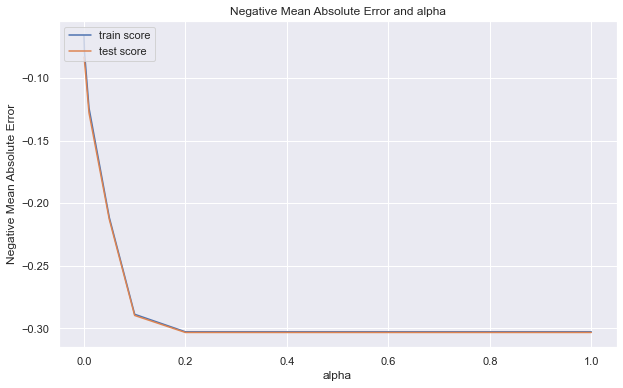

In [1791]:
## Plotting the train and test set graph displaying the alpha score.
plt.figure(figsize = [10,6])
plt.plot(cv_results_data['param_alpha'], cv_results_data['mean_train_score'])
plt.plot(cv_results_data['param_alpha'], cv_results_data['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### As per the above graph we can observe that there is a Negative Mean Absolute Error which is quite low at alpha=0.2 and stabalizes there after, yet we will use lower alpha value in order to balance the trade off between the Bias and the Variance.

#### It also does so to get the coefficients of the smallest features.

In [1792]:
# At alpha = 0.0001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-5.45516820e-02,  9.59600189e-02,  4.25595783e-01,  4.18581070e-01,
        3.42901043e-01, -0.00000000e+00,  1.29328926e-01,  3.48311756e-02,
        2.65356206e-01,  0.00000000e+00,  0.00000000e+00,  6.25872773e-03,
        6.94798816e-01,  4.71808653e-02, -0.00000000e+00,  3.24690297e-02,
        3.87219002e-02,  0.00000000e+00, -3.37960818e-02,  2.14988217e-03,
        1.50359197e-01,  6.92808864e-02,  0.00000000e+00,  6.95732982e-02,
        5.06037303e-02,  9.53775350e-02,  1.42149063e-01, -2.88126242e-01,
        3.02071957e-01,  2.45936209e-01,  2.49324826e-01,  2.10757244e-01,
        4.33261263e-03, -0.00000000e+00,  0.00000000e+00,  1.04196197e-02,
       -5.38868264e-03,  3.04318031e-03,  1.61212439e-02, -1.77256722e-02,
       -3.18265784e-02, -2.39337521e-02,  9.99744845e-03, -2.20522871e-02,
       -0.00000000e+00, -8.49978553e-03,  1.31321504e-02,  4.19896868e-02,
       -3.15813122e-03,  1.17564048e-01, -5.39403294e-02, -0.00000000e+00,
       -4.94100737e-02, -

From the above analysis we can state that the lasso Regression brings the coefficients of insignificant attributes to 0.

In [1793]:
## Lasso model parameters 
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.68),
 ('MSSubClass', -0.055),
 ('LotFrontage', 0.096),
 ('LotArea', 0.426),
 ('OverallQual', 0.419),
 ('OverallCond', 0.343),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.129),
 ('BsmtFinSF2', 0.035),
 ('TotalBsmtSF', 0.265),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.006),
 ('GrLivArea', 0.695),
 ('BsmtFullBath', 0.047),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.032),
 ('HalfBath', 0.039),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.034),
 ('Fireplaces', 0.002),
 ('GarageArea', 0.15),
 ('WoodDeckSF', 0.069),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.07),
 ('3SsnPorch', 0.051),
 ('ScreenPorch', 0.095),
 ('PoolArea', 0.142),
 ('PAge', -0.288),
 ('MSZoning_FV', 0.302),
 ('MSZoning_RH', 0.246),
 ('MSZoning_RL', 0.249),
 ('MSZoning_RM', 0.211),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.01),
 ('LandContour_Low', -0.005),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.016),
 ('LotConfig_FR2', -0.01

In [1794]:
## Applying the Lasso Regression with alpha=0.0001
lm_lasso = Lasso(alpha=0.0001)
lm_lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9371542613533367
0.9078288055303081


In [1795]:
## Finding out the RMSE value for our reference.
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11481482764385151


In [1796]:
## From the above analysis as the R2 of the train and test set matches well, hence indicating an optimal model.

In [1797]:
## Creating a dataframe for the coefficients obtained from Lasso Regression
model_data= list(zip(cols, model_parameters))

In [1798]:
## Displaying the Variable and the Coefficents of the dataframe using Lasso Regression.
para_data = pd.DataFrame(model_data)
para_data.columns = ['Variable', 'Coeff']
para_data.head()

,Variable,Coeff
0,constant,10.680
1,MSSubClass,-0.055
2,LotFrontage,0.096
3,LotArea,0.426
4,OverallQual,0.419


In [1799]:
## Sorting the coefficients in ascending order.
para_data = para_data.sort_values((['Coeff']), axis = 0, ascending = False)
para_data


,Variable,Coeff
0,constant,10.680
13,GrLivArea,0.695
3,LotArea,0.426
4,OverallQual,0.419
5,OverallCond,0.343
...,...,...
173,KitchenQual_TA,-0.090
54,Neighborhood_MeadowV,-0.127
83,HouseStyle_2.5Fin,-0.168
94,Exterior1st_BrkComm,-0.180


In [1800]:
## Now displaying the coefficients which have high Coeeficient.
pred_data = pd.DataFrame(para[(para['Coeff'] != 0)])
pred_data

,Variable,Coeff
0,constant,11.485
13,GrLivArea,0.522
4,OverallQual,0.294
7,BsmtFinSF1,0.128
166,CentralAir_Y,0.076
179,GarageType_Attchd,0.073
134,Foundation_PConc,0.073
31,MSZoning_RL,0.067
151,BsmtFinType1_GLQ,0.046
191,GarageQual_TA,0.036


In [1801]:
## From the above analysis we can observe that there are 22 attributes which have high effect on SalePrice.
pred_data.shape

(23, 2)

In [1802]:
Lassso_var_data = list(pred_data['Variable'])
print(Lassso_var_data)

['constant', 'GrLivArea', 'OverallQual', 'BsmtFinSF1', 'CentralAir_Y', 'GarageType_Attchd', 'Foundation_PConc', 'MSZoning_RL', 'BsmtFinType1_GLQ', 'GarageQual_TA', 'SaleCondition_Partial', 'GarageArea', 'FireplaceQu_Gd', 'PavedDrive_Y', 'BsmtExposure_No', 'RoofStyle_Gable', 'HeatingQC_TA', 'LotShape_Reg', 'BsmtQual_TA', 'MasVnrType_None', 'KitchenQual_TA', 'ExterQual_TA', 'FireplaceQu_none']


In [1803]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
11,0.831245,0.888889,0.50,0.366500,0.529496,0.524160,0.666667,0.049658,0.219178,0.5,1,0.040153,1.000000,0.000000,0.231496
1070,0.298246,0.444444,0.50,0.326887,0.205755,0.307773,0.000000,0.041375,0.174658,0.5,0,0.038241,0.333333,0.484848,0.000000
513,0.311612,0.555556,0.50,0.338116,0.348201,0.176471,0.000000,0.036865,0.171233,0.0,1,0.000000,0.333333,0.000000,0.188976
467,0.547201,0.444444,0.75,0.227074,0.224460,0.202731,0.666667,0.038234,0.198630,0.0,0,0.000000,0.333333,0.000000,0.264567
993,0.487051,0.555556,0.50,0.233936,0.405755,0.000000,0.000000,0.035271,0.160959,0.0,1,0.066922,0.666667,0.000000,0.000000


In [1804]:
X_train_lasso.shape

(1000, 15)

In [1805]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
461,0.291111,0.625,1.000000,0.180995,0.547009,0.159963,0.000000,0.034781,0.242236,0.333333,1,0.000000,0.333333,0.0,0.298716
335,0.580444,0.375,0.571429,0.484486,0.502374,0.570841,0.666667,1.000000,0.397516,0.666667,0,0.000000,0.666667,0.0,0.781797
200,0.284889,0.250,0.428571,0.362314,0.417854,0.000000,0.000000,0.043032,0.366460,0.000000,1,0.153110,0.666667,0.0,0.154026
214,0.405333,0.500,0.714286,0.222689,0.283951,0.172761,0.000000,0.057462,0.304348,0.000000,0,0.086124,0.333333,0.0,0.000000
1003,0.533333,0.375,0.571429,0.542986,0.501425,0.000000,0.000000,0.061140,0.366460,0.000000,0,0.000000,0.666667,0.0,0.000000


In [1806]:
# At alpha = 0.0001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_


array([-4.06166549e-02,  8.47036807e-02,  3.19909759e-01,  4.39947356e-01,
        3.46493090e-01,  0.00000000e+00,  1.28738986e-01,  3.22861379e-02,
        2.65593982e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.90009298e-01,  4.87143762e-02, -0.00000000e+00,  2.28427513e-02,
        3.31916018e-02,  0.00000000e+00, -1.49333033e-02,  0.00000000e+00,
        1.52989325e-01,  6.71134646e-02,  0.00000000e+00,  5.91949416e-02,
        2.07455813e-02,  8.78673454e-02,  1.04368180e-01, -2.88203936e-01,
        2.22774470e-01,  1.61291843e-01,  1.78147026e-01,  1.34462953e-01,
        3.85426336e-03, -0.00000000e+00, -5.98633709e-04,  7.73129101e-03,
       -0.00000000e+00,  0.00000000e+00,  1.85476412e-02, -8.04411960e-03,
       -0.00000000e+00, -2.26815485e-02,  8.29707977e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.02988185e-02,  4.72246804e-02,
       -0.00000000e+00,  1.17442634e-01, -4.17912596e-02, -0.00000000e+00,
       -5.50287968e-02, -

In [1807]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
lm_lasso = Lasso(alpha=0.0002)
lm_lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
#y_train_pred = lm_lasso.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
#y_test_pred = lm_lasso.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

model_data= list(zip(cols, model_parameters))
para_data = pd.DataFrame(model_data)
para_data.columns = ['Variable', 'Coeff']

pred_data = pd.DataFrame(para[(para['Coeff'] != 0)])
pred_data

,Variable,Coeff
0,constant,11.485
13,GrLivArea,0.522
4,OverallQual,0.294
7,BsmtFinSF1,0.128
166,CentralAir_Y,0.076
179,GarageType_Attchd,0.073
134,Foundation_PConc,0.073
31,MSZoning_RL,0.067
151,BsmtFinType1_GLQ,0.046
191,GarageQual_TA,0.036


In [1808]:
## Lasso Regression with alpha value as 0.0002
lm_lasso = Lasso(alpha=0.0002)
lm_lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9338538664769847
0.9042723774614594


## Ridge Regression

In [1809]:
## Applying Ridge Regression on the housing dataframe.
## Listing the alpha values to tune it now.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

In [1810]:
## Cross Validation Step.
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1811]:
## Displaying the Cross Validation result.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004973,0.002929,0.001597,0.002055,0.0001,{'alpha': 0.0001},-0.098824,-0.080586,-0.093923,-0.093385,-0.081908,-0.089725,0.007190,22,-0.063890,-0.066811,-0.062901,-0.064702,-0.065821,-0.064825,0.001380
1,0.006250,0.007655,0.003125,0.006250,0.001,{'alpha': 0.001},-0.098778,-0.080581,-0.093890,-0.093355,-0.081875,-0.089696,0.007180,21,-0.063891,-0.066810,-0.062903,-0.064703,-0.065822,-0.064826,0.001379
2,0.003125,0.006250,0.000000,0.000000,0.01,{'alpha': 0.01},-0.098344,-0.080533,-0.093583,-0.093069,-0.081614,-0.089429,0.007074,19,-0.063908,-0.066799,-0.062929,-0.064710,-0.065836,-0.064836,0.001369
3,0.006920,0.005087,0.002114,0.001218,0.05,{'alpha': 0.05},-0.096778,-0.080335,-0.092571,-0.091992,-0.081120,-0.088559,0.006609,17,-0.064023,-0.066792,-0.063094,-0.064747,-0.065903,-0.064912,0.001314
4,0.009376,0.007655,0.003125,0.006250,0.1,{'alpha': 0.1},-0.095271,-0.080240,-0.091758,-0.090954,-0.080766,-0.087798,0.006133,15,-0.064230,-0.066814,-0.063311,-0.064797,-0.066011,-0.065033,0.001249


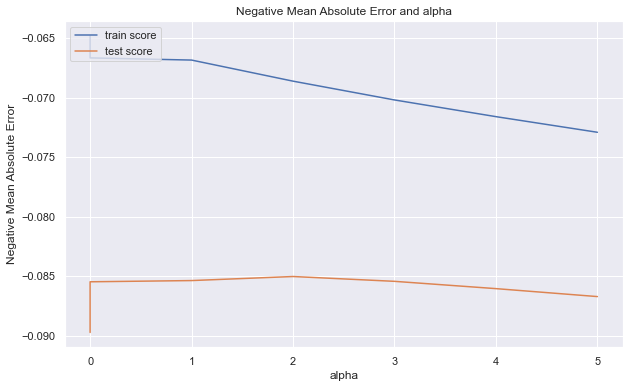

In [1812]:
## Here we will plot the test and train dataset alpha scores.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
## Plotting the train and test set graph displaying the alpha score.
plt.figure(figsize = [10,6])
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1813]:
## From the above analysis we can see that the alpha value at 2 shows some stabalization in the negative mean absolute error, post which it decreases.

In [1814]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.0850254659779005


In [1815]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.06127883,  0.086432  ,  0.18205506,  0.3537872 ,  0.28497029,
        0.0065154 ,  0.12650775,  0.05202788,  0.21303022,  0.26384462,
        0.15613826,  0.04347443,  0.35477432,  0.04648319, -0.00927777,
        0.07553128,  0.05865021,  0.03873872, -0.03629801,  0.03145559,
        0.14024547,  0.06757185,  0.00725869,  0.05886945,  0.05018184,
        0.08328856,  0.10112404, -0.19946232,  0.15007282,  0.11610045,
        0.13381539,  0.1054557 ,  0.01740087,  0.01536098, -0.00085098,
        0.01238533, -0.00272485,  0.00283376,  0.02134122, -0.02644509,
       -0.04617691, -0.02538658,  0.00482545,  0.00749501, -0.0210057 ,
       -0.03104936, -0.0031815 ,  0.05259723, -0.00605187,  0.11251627,
       -0.0611265 , -0.00752539, -0.10271879, -0.14174834, -0.03435038,
       -0.02438134,  0.04144988, -0.01543937,  0.05651669,  0.0589952 ,
       -0.06550124, -0.05926237, -0.01409793,  0.00247589,  0.03500714,
        0.10499458,  0.00783111,  0.03892677,  0.01542052,  0.06

In [1816]:
## Ridge model parameters.
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.917),
 ('MSSubClass', -0.061),
 ('LotFrontage', 0.086),
 ('LotArea', 0.182),
 ('OverallQual', 0.354),
 ('OverallCond', 0.285),
 ('MasVnrArea', 0.007),
 ('BsmtFinSF1', 0.127),
 ('BsmtFinSF2', 0.052),
 ('TotalBsmtSF', 0.213),
 ('1stFlrSF', 0.264),
 ('2ndFlrSF', 0.156),
 ('LowQualFinSF', 0.043),
 ('GrLivArea', 0.355),
 ('BsmtFullBath', 0.046),
 ('BsmtHalfBath', -0.009),
 ('FullBath', 0.076),
 ('HalfBath', 0.059),
 ('BedroomAbvGr', 0.039),
 ('KitchenAbvGr', -0.036),
 ('Fireplaces', 0.031),
 ('GarageArea', 0.14),
 ('WoodDeckSF', 0.068),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.059),
 ('3SsnPorch', 0.05),
 ('ScreenPorch', 0.083),
 ('PoolArea', 0.101),
 ('PAge', -0.199),
 ('MSZoning_FV', 0.15),
 ('MSZoning_RH', 0.116),
 ('MSZoning_RL', 0.134),
 ('MSZoning_RM', 0.105),
 ('LotShape_IR2', 0.017),
 ('LotShape_IR3', 0.015),
 ('LotShape_Reg', -0.001),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.003),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.021),
 ('LotCo

In [1817]:
# Ridge Regression at Alpha=2.
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.934394054456268
0.9119107555140858


In [1818]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11224365829518695


In [1819]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [1820]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
9,TotalBsmtSF,0.213
3,LotArea,0.182
11,2ndFlrSF,0.156
29,MSZoning_FV,0.150
21,GarageArea,0.140


In [1821]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
...,...,...
94,Exterior1st_BrkComm,-0.094
173,KitchenQual_TA,-0.099
53,Neighborhood_IDOTRR,-0.103
54,Neighborhood_MeadowV,-0.142


In [1822]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
...,...,...
94,Exterior1st_BrkComm,-0.094
173,KitchenQual_TA,-0.099
53,Neighborhood_IDOTRR,-0.103
54,Neighborhood_MeadowV,-0.142


In [1823]:
# Ridge Regression at Alpha=4.
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9300994903116862
0.9121396866324534


### From the above analysis we can observe that the model performance is better in Ridge regression in comparision to Lasso by slight margin, yet if we look at interpretibility it is better to go with Lasso as it is more genralized form and assigns 0 to the insignificant attributes making the prediction easier. 

In [1824]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [1825]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
9,TotalBsmtSF,0.213
3,LotArea,0.182
11,2ndFlrSF,0.156
29,MSZoning_FV,0.150
21,GarageArea,0.140


In [1826]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
...,...,...
94,Exterior1st_BrkComm,-0.094
173,KitchenQual_TA,-0.099
53,Neighborhood_IDOTRR,-0.103
54,Neighborhood_MeadowV,-0.142


In [1827]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,10.917
13,GrLivArea,0.355
4,OverallQual,0.354
5,OverallCond,0.285
10,1stFlrSF,0.264
...,...,...
94,Exterior1st_BrkComm,-0.094
173,KitchenQual_TA,-0.099
53,Neighborhood_IDOTRR,-0.103
54,Neighborhood_MeadowV,-0.142


In [1828]:
predRFE.shape

(207, 2)

#### Observation:

- As per the model performance in between the Ridge and Lasso regression, the performance of Ridge Regression was better in terms of R2 values of Train and Test.
  yet it is better and recomended to use Lasso as it assigns 0 value to the insignificant attributes and helps us to indetify and work with the predictive variable.
- It is also advised to use optimal and robust method while solving any business problem.


In [1829]:
## The attributes which have the highest effect on the dataset.
pred_data.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'X22']), inplace = True) 
pred_data

,Variable,Coeff
C,constant,11.485
x1,GrLivArea,0.522
x2,OverallQual,0.294
x3,BsmtFinSF1,0.128
x4,CentralAir_Y,0.076
x5,GarageType_Attchd,0.073
x6,Foundation_PConc,0.073
x7,MSZoning_RL,0.067
x8,BsmtFinType1_GLQ,0.046
x9,GarageQual_TA,0.036


In [1830]:
## Post removal of the top 5 most effective attributes.
X_train_ad=X_train

In [1831]:
X_train_ad.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.235294,0.219178,0.049658,0.888889,0.50,0.17875,0.524160,0.0,0.366500,0.388812,0.708876,0.0,0.831245,0.5,0.0,1.000000,0.0,0.666667,0.333333,0.666667,0.529496,0.231496,0.040153,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1070,0.000000,0.174658,0.041375,0.444444,0.50,0.07500,0.307773,0.0,0.326887,0.327373,0.000000,0.0,0.298246,0.5,0.0,0.333333,0.0,0.500000,0.333333,0.000000,0.205755,0.000000,0.038241,0.000000,0.0,0.484848,0.0,0.377778,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
513,0.000000,0.171233,0.036865,0.555556,0.50,0.00000,0.176471,0.0,0.338116,0.342045,0.000000,0.0,0.311612,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.000000,0.348201,0.188976,0.000000,0.409326,0.0,0.000000,0.0,0.177778,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.294118,0.198630,0.038234,0.444444,0.75,0.14000,0.202731,0.0,0.227074,0.254012,0.469274,0.0,0.547201,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.666667,0.224460,0.264567,0.000000,0.000000,0.0,0.000000,0.0,0.481481,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
993,0.235294,0.160959,0.035271,0.555556,0.50,0.00000,0.000000,0.0,0.233936,0.190738,0.465549,0.0,0.487051,0.0,0.0,0.666667,0.5,0.500000,0.333333,0.000000,0.405755,0.000000,0.066922,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [1832]:
X_test_ad=X_test

In [1833]:
X_test_ad.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.294118,0.242236,0.034781,0.625,1.000000,0.000000,0.159963,0.142469,0.180995,0.089783,0.392707,0.0,0.291111,0.333333,0.0,0.333333,0.0,0.500000,0.0,0.000000,0.547009,0.298716,0.000000,0.0,0.0,0.0,0.0,0.536765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
335,1.000000,0.397516,1.000000,0.375,0.571429,0.000000,0.570841,0.099729,0.484486,0.551526,0.117111,0.0,0.580444,0.666667,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.502374,0.781797,0.000000,0.0,0.0,0.0,0.0,0.316176,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,0.000000,0.366460,0.043032,0.250,0.428571,0.000000,0.000000,0.000000,0.362314,0.331269,0.000000,0.0,0.284889,0.000000,0.0,0.666667,0.0,0.333333,0.0,0.000000,0.417854,0.154026,0.153110,0.0,0.0,0.0,0.0,0.051471,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
214,0.235294,0.304348,0.057462,0.500,0.714286,0.137220,0.172761,0.000000,0.222689,0.140203,0.492987,0.0,0.405333,0.000000,0.0,0.333333,0.5,0.500000,0.0,0.000000,0.283951,0.000000,0.086124,0.0,0.0,0.0,0.0,0.242647,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1003,0.411765,0.366460,0.061140,0.375,0.571429,0.147085,0.000000,0.000000,0.542986,0.578505,0.000000,0.0,0.533333,0.000000,0.0,0.666667,0.0,0.666667,0.5,0.000000,0.501425,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227941,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1834]:
X_train2 = X_train_ad.drop(['GrLivArea','OverallQual','BsmtFinSF1','CentralAir_Y','GarageType_Attchd'],axis=1)
X_test2 = X_test_ad.drop(['GrLivArea','OverallQual','BsmtFinSF1','CentralAir_Y','GarageType_Attchd'],axis=1)

In [1835]:
X_train2.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.235294,0.219178,0.049658,0.50,0.17875,0.0,0.366500,0.388812,0.708876,0.0,0.5,0.0,1.000000,0.0,0.666667,0.333333,0.666667,0.529496,0.231496,0.040153,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1070,0.000000,0.174658,0.041375,0.50,0.07500,0.0,0.326887,0.327373,0.000000,0.0,0.5,0.0,0.333333,0.0,0.500000,0.333333,0.000000,0.205755,0.000000,0.038241,0.000000,0.0,0.484848,0.0,0.377778,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
513,0.000000,0.171233,0.036865,0.50,0.00000,0.0,0.338116,0.342045,0.000000,0.0,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.000000,0.348201,0.188976,0.000000,0.409326,0.0,0.000000,0.0,0.177778,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.294118,0.198630,0.038234,0.75,0.14000,0.0,0.227074,0.254012,0.469274,0.0,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.666667,0.224460,0.264567,0.000000,0.000000,0.0,0.000000,0.0,0.481481,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
993,0.235294,0.160959,0.035271,0.50,0.00000,0.0,0.233936,0.190738,0.465549,0.0,0.0,0.0,0.666667,0.5,0.500000,0.333333,0.000000,0.405755,0.000000,0.066922,0.000000,0.0,0.000000,0.0,0.007407,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [1836]:
X_test2.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.294118,0.242236,0.034781,1.000000,0.000000,0.142469,0.180995,0.089783,0.392707,0.0,0.333333,0.0,0.333333,0.0,0.500000,0.0,0.000000,0.547009,0.298716,0.000000,0.0,0.0,0.0,0.0,0.536765,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
335,1.000000,0.397516,1.000000,0.571429,0.000000,0.099729,0.484486,0.551526,0.117111,0.0,0.666667,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.502374,0.781797,0.000000,0.0,0.0,0.0,0.0,0.316176,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
200,0.000000,0.366460,0.043032,0.428571,0.000000,0.000000,0.362314,0.331269,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.333333,0.0,0.000000,0.417854,0.154026,0.153110,0.0,0.0,0.0,0.0,0.051471,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
214,0.235294,0.304348,0.057462,0.714286,0.137220,0.000000,0.222689,0.140203,0.492987,0.0,0.000000,0.0,0.333333,0.5,0.500000,0.0,0.000000,0.283951,0.000000,0.086124,0.0,0.0,0.0,0.0,0.242647,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1003,0.411765,0.366460,0.061140,0.571429,0.147085,0.000000,0.542986,0.578505,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.666667,0.5,0.000000,0.501425,0.000000,0.000000,0.0,0.0,0.0,0.0,0.227941,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1837]:
# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train2,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test2)
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train2.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Coeff'},inplace=True)
lasso3_coeff.sort_values(by=['Coeff'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The most important predictor variables are as follows:


,Coeff
1stFlrSF,0.689593
2ndFlrSF,0.492776
LotArea,0.454791
OverallCond,0.416969
TotalBsmtSF,0.373215
